In [9]:
import pandas as pd

merged_data = pd.read_csv('merged_data.csv')

In [12]:
merged_data.columns

Index(['Store Name', 'Address', 'FSA', 'LANDAREA',
       'Bachelor's degree or higher', 'Car, truck or van - as a driver',
       'Car, truck or van - as a passenger', 'Couple-family households',
       'Employed', 'Employee', 'Median age of the population',
       'Median total income of household in 2020 ($)', 'Permanent position',
       'Population, 2021', 'Temporary position', 'With children',
       'population_density'],
      dtype='str')

In [13]:
# Summary statistics for all Farm Boy locations
print(merged_data.describe())

# Or get the mean values
avg_demographics = merged_data[['LANDAREA',
       "Bachelor's degree or higher",
       'Car, truck or van - as a driver',
       'Car, truck or van - as a passenger', 'Couple-family households',
       'Employed', 'Employee', 'Median age of the population',
       'Median total income of household in 2020 ($)', 'Permanent position',
       'Population, 2021', 'Temporary position', 'With children',
       'population_density']].mean()

print("\nAverage Farm Boy Market Profile:")
print(avg_demographics)

         LANDAREA  Bachelor's degree or higher  \
count   51.000000                    51.000000   
mean    25.962594                  9135.980392   
std     32.727171                  5991.943426   
min      0.495100                  2000.000000   
25%      6.728700                  5260.000000   
50%     13.420400                  8015.000000   
75%     33.340000                 10852.500000   
max    182.158900                 34995.000000   

       Car, truck or van - as a driver  Car, truck or van - as a passenger  \
count                        51.000000                           51.000000   
mean                       7511.078431                          790.588235   
std                        5548.351765                          554.936615   
min                         860.000000                           75.000000   
25%                        3045.000000                          325.000000   
50%                        6055.000000                          760.000000   
75%

In [14]:
# Group stores by population density ranges
merged_data['density_category'] = pd.cut(merged_data['population_density'], 
                                          bins=[0, 50, 500, 2000, 20000],
                                          labels=['Rural', 'Suburban', 'Urban', 'Dense Urban'])

print(merged_data.groupby('density_category').size())

density_category
Suburban        3
Urban          22
Dense Urban    24
dtype: int64


In [15]:
# Distribution of median age
print(f"Average median age: {merged_data['Median age of the population'].mean():.1f}")
print(f"Age range: {merged_data['Median age of the population'].min():.1f} - {merged_data['Median age of the population'].max():.1f}")

Average median age: 40.2
Age range: 31.4 - 48.0


In [16]:
# Population served
print(f"Total population served: {merged_data['Population, 2021'].sum():,.0f}")
print(f"Average population per FSA: {merged_data['Population, 2021'].mean():,.0f}")

Total population served: 1,810,313
Average population per FSA: 35,496


In [17]:
# Typical Farm Boy market profile
profile = {
    'Avg Population': merged_data['Population, 2021'].mean(),
    'Avg Population Density': merged_data['population_density'].mean(),
    'Avg Median Age': merged_data['Median age of the population'].mean(),
    'Most Common Density Type': merged_data['density_category'].mode()[0]
}

print("\nFarm Boy Typical Market Profile:")
for key, value in profile.items():
    print(f"{key}: {value}")


Farm Boy Typical Market Profile:
Avg Population: 35496.333333333336
Avg Population Density: 3899.55261762151
Avg Median Age: 40.23137254901961
Most Common Density Type: Dense Urban


In [19]:
df = merged_data

# STEP 1: CREATING DERIVED MERICS

In [21]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('merged_data.csv')

# === EDUCATION METRICS ===
df['education_rate'] = (df["Bachelor's degree or higher"] / df['Population, 2021']) * 100

# === EMPLOYMENT METRICS ===
df['employment_rate'] = (df['Employed'] / df['Population, 2021']) * 100
df['employee_rate'] = (df['Employee'] / df['Employed']) * 100  # Employee vs self-employed
df['permanent_rate'] = (df['Permanent position'] / df['Employed']) * 100
df['temporary_rate'] = (df['Temporary position'] / df['Employed']) * 100

# === TRANSPORTATION METRICS ===
df['driver_rate'] = (df['Car, truck or van - as a driver'] / df['Population, 2021']) * 100
df['passenger_rate'] = (df['Car, truck or van - as a passenger'] / df['Population, 2021']) * 100
df['total_car_use_rate'] = df['driver_rate'] + df['passenger_rate']

# === FAMILY STRUCTURE METRICS ===
df['couple_family_rate'] = (df['Couple-family households'] / df['Population, 2021']) * 100
df['children_rate'] = (df['With children'] / df['Population, 2021']) * 100

# === DENSITY CATEGORIES ===
df['density_category'] = pd.cut(
    df['population_density'],
    bins=[0, 500, 2000, 5000, 35000],
    labels=['Low Density', 'Medium Density', 'High Density', 'Very High Density']
)

# === AGE CATEGORIES ===
df['age_category'] = pd.cut(
    df['Median age of the population'],
    bins=[0, 35, 40, 45, 100],
    labels=['Young (<35)', 'Young-Middle (35-40)', 'Middle-Mature (40-45)', 'Mature (45+)']
)

# === INCOME CATEGORIES ===
df['income_category'] = pd.cut(
    df['Median total income of household in 2020 ($)'],
    bins=[0, 80000, 100000, 120000, 150000],
    labels=['Lower-Middle (<$80k)', 'Middle ($80k-$100k)', 'Upper-Middle ($100k-$120k)', 'High ($120k+)']
)

# === REGION (from FSA prefix) ===
df['region_code'] = df['FSA'].str[0]
region_map = {
    'K': 'Eastern Ontario',
    'L': 'GTA/Golden Horseshoe', 
    'M': 'Toronto',
    'N': 'Southwestern Ontario',
    'P': 'Northern Ontario'
}
df['region'] = df['region_code'].map(region_map)

print("✓ All derived metrics created!")
print(f"\nNew dataset shape: {df.shape}")

✓ All derived metrics created!

New dataset shape: (51, 32)


# STEP 2: EXPLORATORY DATA ANALYSIS

2.1 Income Analysis

INCOME ANALYSIS

Median Household Income Statistics:
count        51.000000
mean      99454.901961
std       22675.222722
min       58000.000000
25%       79750.000000
50%       98000.000000
75%      118500.000000
max      141000.000000
Name: Median total income of household in 2020 ($), dtype: float64

Income by Region:
                               mean    median      min       max
region                                                          
Eastern Ontario        97594.444444  104500.0  61200.0  141000.0
GTA/Golden Horseshoe  114142.857143  119000.0  82000.0  139000.0
Southwestern Ontario   81437.500000   76000.0  70000.0  103000.0
Toronto                96909.090909   95000.0  58000.0  130000.0

Income by Density Category:
                            mean    median
density_category                          
Low Density         91733.333333   77000.0
Medium Density     105500.000000  110500.0
High Density       100305.555556  102000.0
Very High Density   83812.500000   89500.0


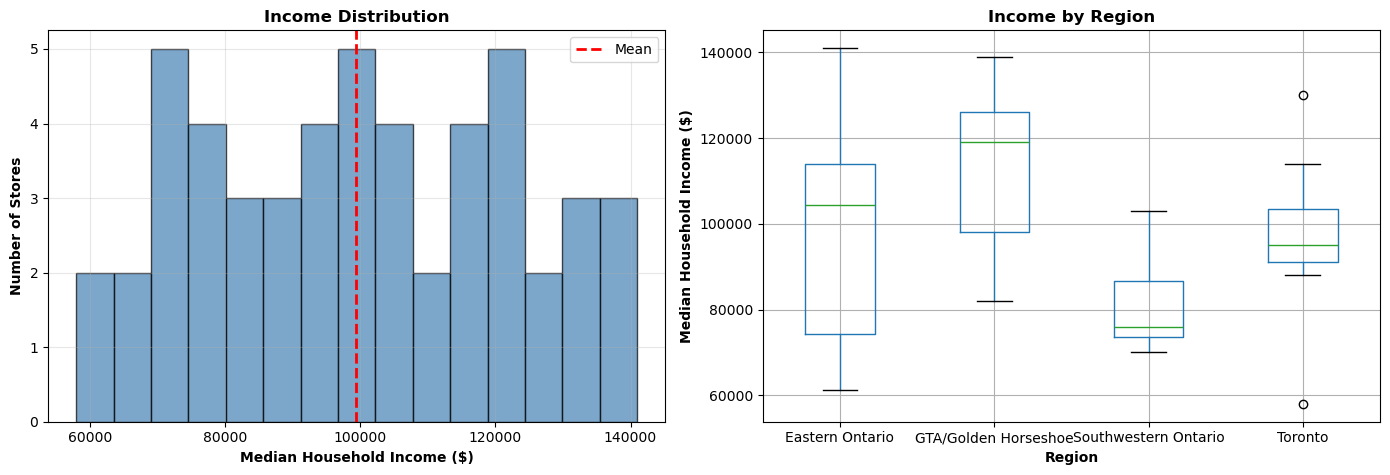

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("INCOME ANALYSIS")
print("="*70)

# Basic statistics
print(f"\nMedian Household Income Statistics:")
print(df['Median total income of household in 2020 ($)'].describe())

# Income by region
print("\nIncome by Region:")
income_by_region = df.groupby('region')['Median total income of household in 2020 ($)'].agg(['mean', 'median', 'min', 'max'])
print(income_by_region)

# Income by density category
print("\nIncome by Density Category:")
income_by_density = df.groupby('density_category')['Median total income of household in 2020 ($)'].agg(['mean', 'median'])
print(income_by_density)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Median total income of household in 2020 ($)'], bins=15, 
             edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['Median total income of household in 2020 ($)'].mean(), 
                color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].set_xlabel('Median Household Income ($)', fontweight='bold')
axes[0].set_ylabel('Number of Stores', fontweight='bold')
axes[0].set_title('Income Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot by region
df.boxplot(column='Median total income of household in 2020 ($)', 
           by='region', ax=axes[1])
axes[1].set_xlabel('Region', fontweight='bold')
axes[1].set_ylabel('Median Household Income ($)', fontweight='bold')
axes[1].set_title('Income by Region', fontweight='bold')
plt.suptitle('')

plt.tight_layout()
plt.savefig('income_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Income visualization saved!")

Key Questions:

What's the income "sweet spot" for Farm Boy stores?
- The median household income (CAD) range is: 79,750 - 118,500.

Do urban stores (Toronto) have higher income than suburban?
- In terms of income, GTA leads as number one, followed by Eastern Ontario (e.g. Ottawa), then Toronto.

What's the minimum viable income for profitability?
- Minimum median household income would be $58,000.

2.2 Education Analysis


EDUCATION ANALYSIS

Education Rate Statistics:
count    51.000000
mean     27.160469
std      11.972295
min       6.570302
25%      20.196103
50%      25.072990
75%      31.606181
max      59.003311
Name: education_rate, dtype: float64

Top 10 Most Educated Markets:
        Store Name FSA  education_rate  Median total income of household in 2020 ($)
       Sugar Wharf M5E       59.003311                                       98000.0
Front and Bathurst M5V       58.410669                                       91000.0
      Harbourfront M5J       56.993898                                       94000.0
  Yonge and Soudan M4S       46.432984                                       88000.0
   College and Bay M5B       44.914476                                       58000.0
          Metcalfe K2P       42.576361                                       66500.0
         St. Clair M4T       38.666280                                      114000.0
  Signature Centre K2T       38.370820              

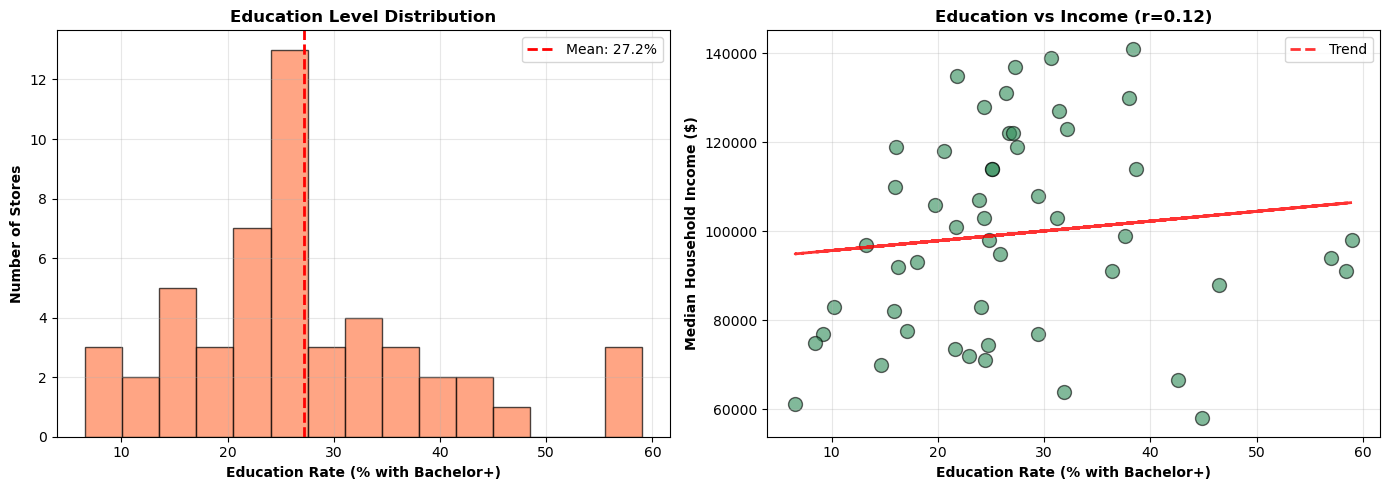

In [23]:
print("\n" + "="*70)
print("EDUCATION ANALYSIS")
print("="*70)

# Basic statistics
print(f"\nEducation Rate Statistics:")
print(df['education_rate'].describe())

# Top 10 most educated markets
print("\nTop 10 Most Educated Markets:")
top_education = df.nlargest(10, 'education_rate')[
    ['Store Name', 'FSA', 'education_rate', 'Median total income of household in 2020 ($)']
]
print(top_education.to_string(index=False))

# Education by density
print("\nEducation Rate by Density Category:")
education_by_density = df.groupby('density_category')['education_rate'].agg(['mean', 'median'])
print(education_by_density)

# Education vs Income correlation
corr = df['education_rate'].corr(df['Median total income of household in 2020 ($)'])
print(f"\nEducation-Income Correlation: r = {corr:.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['education_rate'], bins=15, edgecolor='black', alpha=0.7, color='coral')
axes[0].axvline(df['education_rate'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f"Mean: {df['education_rate'].mean():.1f}%")
axes[0].set_xlabel('Education Rate (% with Bachelor+)', fontweight='bold')
axes[0].set_ylabel('Number of Stores', fontweight='bold')
axes[0].set_title('Education Level Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Scatter: Education vs Income
axes[1].scatter(df['education_rate'], 
                df['Median total income of household in 2020 ($)'],
                s=100, alpha=0.6, edgecolors='black', c='seagreen')
axes[1].set_xlabel('Education Rate (% with Bachelor+)', fontweight='bold')
axes[1].set_ylabel('Median Household Income ($)', fontweight='bold')
axes[1].set_title(f'Education vs Income (r={corr:.2f})', fontweight='bold')
axes[1].grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['education_rate'], df['Median total income of household in 2020 ($)'], 1)
p = np.poly1d(z)
axes[1].plot(df['education_rate'], p(df['education_rate']), 
             "r--", linewidth=2, alpha=0.8, label='Trend')
axes[1].legend()

plt.tight_layout()
plt.savefig('education_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Education visualization saved!")

Insights:
- Relatively low correlation between education and income (r=0.12)
- Bachelor's degree holders concentrate in very high density areas, with a median education rate of 44%.
- Most stores seriving educated residents are in the Toronto core, with postal codes starting with M.

2.3 Family Structure Analysis


FAMILY STRUCTURE ANALYSIS

Couple-Family Rate Statistics:
count    51.000000
mean     20.082471
std       2.158393
min      14.177477
25%      18.834681
50%      19.951327
75%      21.651511
max      24.434795
Name: couple_family_rate, dtype: float64

Children Rate Statistics:
count    51.000000
mean      1.135114
std       0.443825
min       0.382036
25%       0.824705
50%       1.079811
75%       1.356799
max       2.365309
Name: children_rate, dtype: float64

Family Structure by Age Category:
                       couple_family_rate  children_rate
age_category                                            
Young (<35)                     17.491114       0.488661
Young-Middle (35-40)            19.762712       1.198508
Middle-Mature (40-45)           20.547101       1.169376
Mature (45+)                    22.034141       1.381376

Family Structure by Density:
                   couple_family_rate  children_rate
density_category                                    
Low Density         

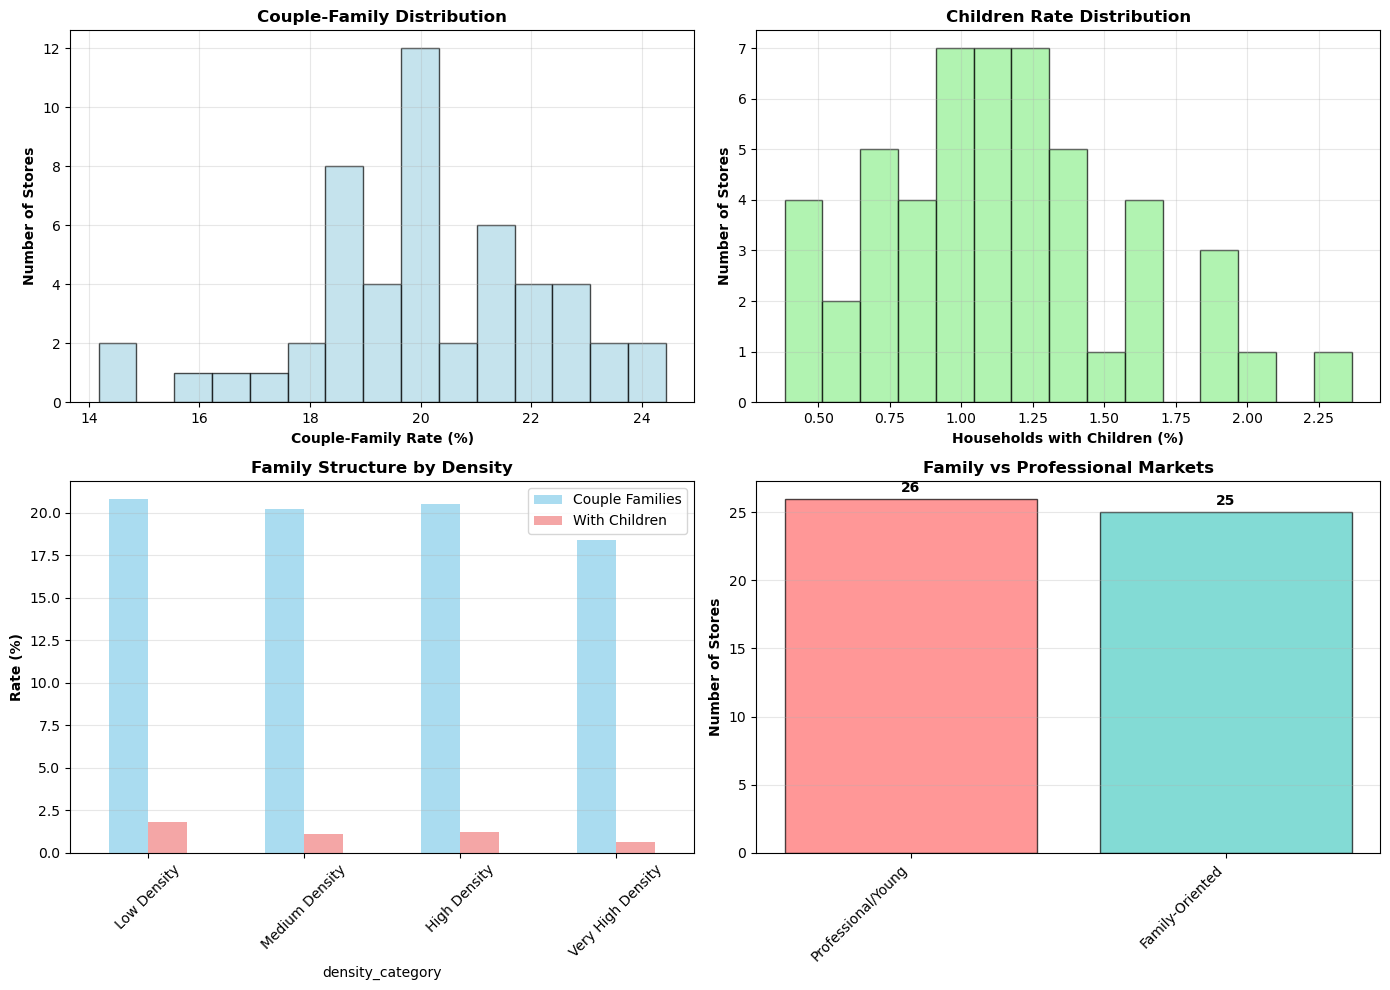

In [24]:
print("\n" + "="*70)
print("FAMILY STRUCTURE ANALYSIS")
print("="*70)

# Basic statistics
print(f"\nCouple-Family Rate Statistics:")
print(df['couple_family_rate'].describe())

print(f"\nChildren Rate Statistics:")
print(df['children_rate'].describe())

# By age category
print("\nFamily Structure by Age Category:")
family_by_age = df.groupby('age_category')[['couple_family_rate', 'children_rate']].mean()
print(family_by_age)

# By density
print("\nFamily Structure by Density:")
family_by_density = df.groupby('density_category')[['couple_family_rate', 'children_rate']].mean()
print(family_by_density)

# Identify family-oriented vs professional markets
median_children = df['children_rate'].median()
df['market_type'] = df['children_rate'].apply(
    lambda x: 'Family-Oriented' if x > median_children else 'Professional/Young'
)

print(f"\nMarket Type Distribution:")
print(df['market_type'].value_counts())

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Couple family rate distribution
axes[0, 0].hist(df['couple_family_rate'], bins=15, edgecolor='black', 
                alpha=0.7, color='lightblue')
axes[0, 0].set_xlabel('Couple-Family Rate (%)', fontweight='bold')
axes[0, 0].set_ylabel('Number of Stores', fontweight='bold')
axes[0, 0].set_title('Couple-Family Distribution', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Children rate distribution
axes[0, 1].hist(df['children_rate'], bins=15, edgecolor='black', 
                alpha=0.7, color='lightgreen')
axes[0, 1].set_xlabel('Households with Children (%)', fontweight='bold')
axes[0, 1].set_ylabel('Number of Stores', fontweight='bold')
axes[0, 1].set_title('Children Rate Distribution', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Family rate by density
family_by_density.plot(kind='bar', ax=axes[1, 0], rot=45, 
                        color=['skyblue', 'lightcoral'], alpha=0.7)
axes[1, 0].set_ylabel('Rate (%)', fontweight='bold')
axes[1, 0].set_title('Family Structure by Density', fontweight='bold')
axes[1, 0].legend(['Couple Families', 'With Children'])
axes[1, 0].grid(alpha=0.3, axis='y')

# Family vs professional markets
market_counts = df['market_type'].value_counts()
axes[1, 1].bar(range(len(market_counts)), market_counts.values, 
               color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='black')
axes[1, 1].set_xticks(range(len(market_counts)))
axes[1, 1].set_xticklabels(market_counts.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Number of Stores', fontweight='bold')
axes[1, 1].set_title('Family vs Professional Markets', fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='y')

for i, v in enumerate(market_counts.values):
    axes[1, 1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('family_structure_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Family structure visualization saved!")

Insights:
- Negative correlation between density and couple family rate; positive correlation between couple family rate and age group.
- Equal numbers of stores serving families and professionals.
- Most families served do not have children

2.4 Employment & Car Ownership


EMPLOYMENT & TRANSPORTATION ANALYSIS

Employment Statistics:
       employment_rate  permanent_rate  temporary_rate
count        51.000000       51.000000       51.000000
mean         48.561985       78.977645       15.418130
std           6.597077        5.002926        3.494313
min          37.253614       65.957447       10.532915
25%          45.266200       76.494983       13.065603
50%          47.594979       79.212963       14.516524
75%          49.379524       82.017754       16.847754
max          72.489651       88.279773       29.447853

Car Ownership Statistics:
       driver_rate  total_car_use_rate
count    51.000000           51.000000
mean     19.679890           21.787818
std       6.928472            7.566071
min       4.936287            5.940765
25%      15.513712           17.557338
50%      21.296250           23.573201
75%      24.566556           27.102869
max      30.773045           33.981257

Employment & Car Use by Density:
                   employment_r

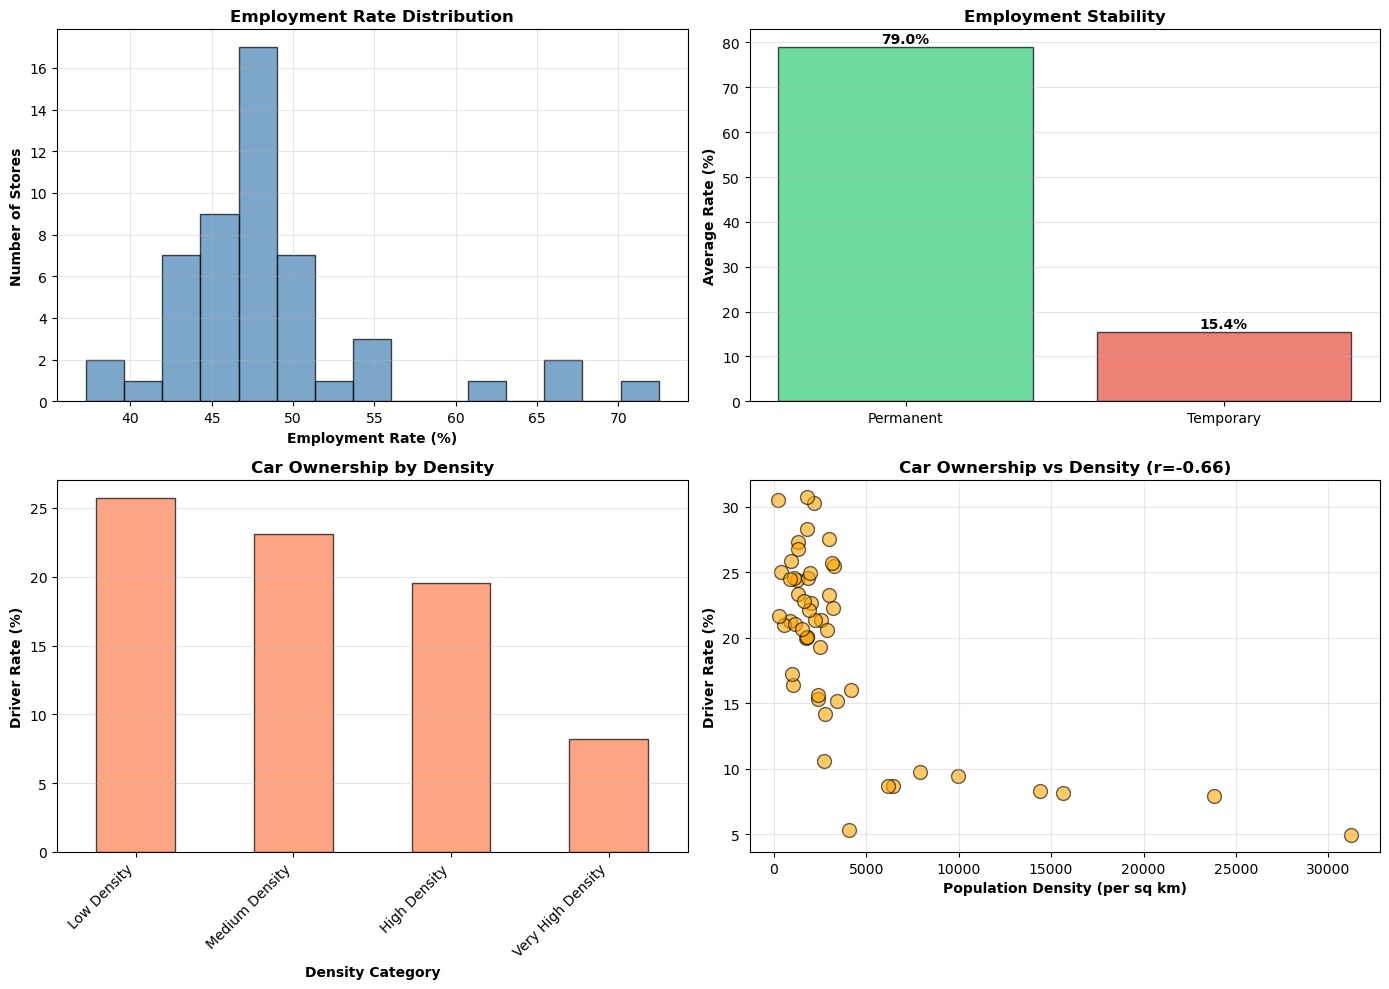

In [26]:
print("\n" + "="*70)
print("EMPLOYMENT & TRANSPORTATION ANALYSIS")
print("="*70)

# Employment statistics
print("\nEmployment Statistics:")
print(df[['employment_rate', 'permanent_rate', 'temporary_rate']].describe())

# Car ownership statistics
print("\nCar Ownership Statistics:")
print(df[['driver_rate', 'total_car_use_rate']].describe())

# By density
print("\nEmployment & Car Use by Density:")
transport_by_density = df.groupby('density_category')[
    ['employment_rate', 'permanent_rate', 'driver_rate']
].mean()
print(transport_by_density)

# Car ownership vs density correlation
car_density_corr = df['driver_rate'].corr(df['population_density'])
print(f"\nCar Ownership vs Density Correlation: r = {car_density_corr:.3f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Employment rate distribution
axes[0, 0].hist(df['employment_rate'], bins=15, edgecolor='black', 
                alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Employment Rate (%)', fontweight='bold')
axes[0, 0].set_ylabel('Number of Stores', fontweight='bold')
axes[0, 0].set_title('Employment Rate Distribution', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Permanent vs temporary employment
emp_comparison = df[['permanent_rate', 'temporary_rate']].mean()
axes[0, 1].bar(['Permanent', 'Temporary'], emp_comparison.values,
               color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0, 1].set_ylabel('Average Rate (%)', fontweight='bold')
axes[0, 1].set_title('Employment Stability', fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')
for i, v in enumerate(emp_comparison.values):
    axes[0, 1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Car ownership by density
transport_by_density['driver_rate'].plot(kind='bar', ax=axes[1, 0], 
                                          color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Driver Rate (%)', fontweight='bold')
axes[1, 0].set_xlabel('Density Category', fontweight='bold')
axes[1, 0].set_title('Car Ownership by Density', fontweight='bold')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].grid(alpha=0.3, axis='y')

# Scatter: Car ownership vs density
axes[1, 1].scatter(df['population_density'], df['driver_rate'],
                   s=100, alpha=0.6, edgecolors='black', c='orange')
axes[1, 1].set_xlabel('Population Density (per sq km)', fontweight='bold')
axes[1, 1].set_ylabel('Driver Rate (%)', fontweight='bold')
axes[1, 1].set_title(f'Car Ownership vs Density (r={car_density_corr:.2f})', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('employment_transportation_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Employment & transportation visualization saved!")

Insights:
- Average employment rate is as high as 49%.
- Most shoppers served are permanent employees as opposed to temporary/contractors, suggesting high employment stability.
- Relatively strong negative correlatioin between car ownership and density (r=0.66), where low density areas have the highest driver rates as expected.

# STEP 3: CORRELATION ANALYSIS


COMPREHENSIVE CORRELATION ANALYSIS

Top 10 Strongest Correlations (absolute value):
                                  Variable 1         Variable 2  Correlation
                              education_rate    employment_rate     0.872373
                              education_rate        driver_rate    -0.858025
                              education_rate      children_rate    -0.820236
Median total income of household in 2020 ($) couple_family_rate     0.688984
                                 driver_rate      children_rate     0.663277
                             employment_rate        driver_rate    -0.662627
                          population_density        driver_rate    -0.659192
                          population_density    employment_rate     0.652982
                          population_density     education_rate     0.645825
                Median age of the population couple_family_rate     0.610208

✓ Correlation matrix saved!


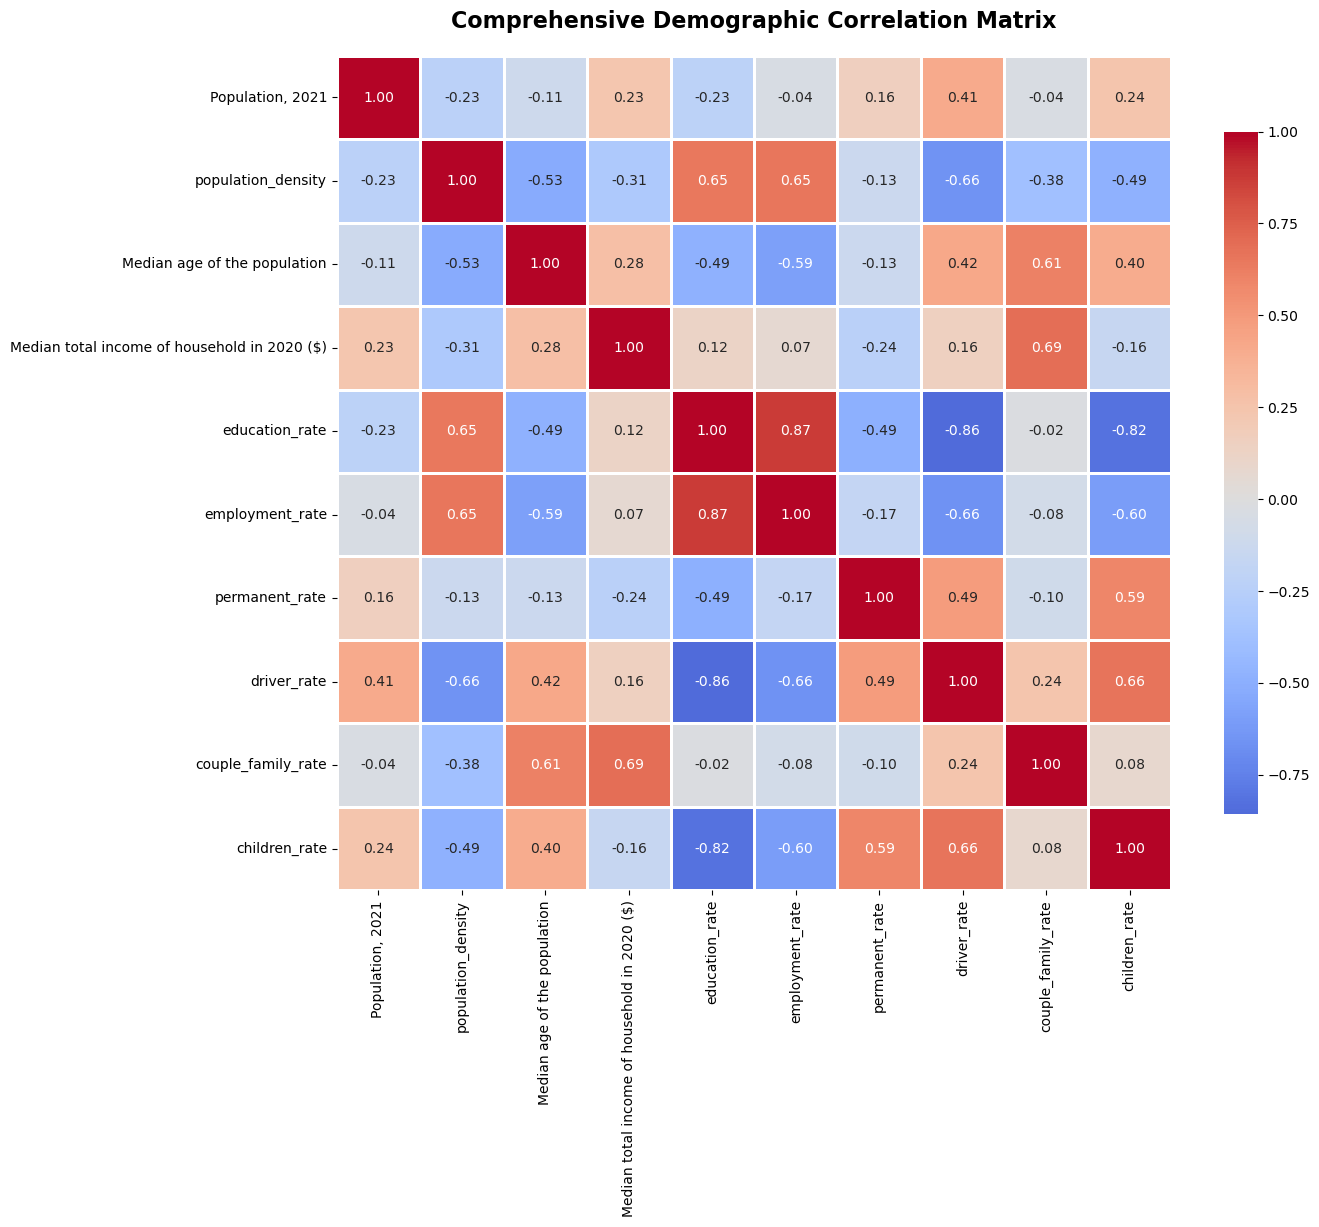

In [27]:
print("\n" + "="*70)
print("COMPREHENSIVE CORRELATION ANALYSIS")
print("="*70)

# Select all derived rate variables for correlation
correlation_vars = [
    'Population, 2021',
    'population_density',
    'Median age of the population',
    'Median total income of household in 2020 ($)',
    'education_rate',
    'employment_rate',
    'permanent_rate',
    'driver_rate',
    'couple_family_rate',
    'children_rate'
]

# Calculate correlation matrix
corr_matrix = df[correlation_vars].corr()

# Display key correlations
print("\nTop 10 Strongest Correlations (absolute value):")
# Get upper triangle of correlation matrix
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Variable 1': corr_matrix.columns[i],
            'Variable 2': corr_matrix.columns[j],
            'Correlation': corr_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False).head(10)
print(corr_df[['Variable 1', 'Variable 2', 'Correlation']].to_string(index=False))

# Visualization
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Comprehensive Demographic Correlation Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Correlation matrix saved!")

Insights:
- Strong link between education and employment (r=0.87)
- Clear distinction between high-density urban lifestyles and more suburban/rural areas, where in denser, highly educated areas, people are less likely to drive or have children, likely due to better public transit and different lifestyle choices.
- Areas with more children have a higher rate of drivers (r=0.66); there is also a link between having children vs having permenant employment. Conversely, children rate goes up as education rate (r=-0.82) and employment rate (r=-0.60) go down.
- Dual-income or multi-adult households are the primary driver of higher income, rather than education.
- older populations served are less likely to be employed (r=-0.59) or live in dense areas (r=-0.53).

# STEP 4: MARKET SEGMENTATION

4.1 Create purchasing Power Index

In [28]:
print("\n" + "="*70)
print("PURCHASING POWER INDEX")
print("="*70)

from sklearn.preprocessing import MinMaxScaler

# Normalize to 0-100 scale
scaler = MinMaxScaler(feature_range=(0, 100))

df['income_score'] = scaler.fit_transform(
    df[['Median total income of household in 2020 ($)']]
)
df['education_score'] = scaler.fit_transform(
    df[['education_rate']]
)
df['employment_score'] = scaler.fit_transform(
    df[['employment_rate']]
)

# Create composite Purchasing Power Index
df['purchasing_power_index'] = (
    df['income_score'] * 0.50 +      # 50% weight - most important
    df['education_score'] * 0.30 +   # 30% weight
    df['employment_score'] * 0.20    # 20% weight
)

# Rank markets
print("\nTop 15 Markets by Purchasing Power:")
top_purchasing = df.nlargest(15, 'purchasing_power_index')[
    ['Store Name', 'FSA', 'purchasing_power_index', 
     'Median total income of household in 2020 ($)', 'education_rate', 'employment_rate']
]
print(top_purchasing.to_string(index=False))

# Bottom 10 markets
print("\nBottom 10 Markets by Purchasing Power:")
bottom_purchasing = df.nsmallest(10, 'purchasing_power_index')[
    ['Store Name', 'FSA', 'purchasing_power_index', 
     'Median total income of household in 2020 ($)']
]
print(bottom_purchasing.to_string(index=False))

# By region
print("\nAverage Purchasing Power by Region:")
ppi_by_region = df.groupby('region')['purchasing_power_index'].mean().sort_values(ascending=False)
print(ppi_by_region)


PURCHASING POWER INDEX

Top 15 Markets by Purchasing Power:
            Store Name FSA  purchasing_power_index  Median total income of household in 2020 ($)  education_rate  employment_rate
      Signature Centre K2T               74.064708                                      141000.0       38.370820        47.594979
           Sugar Wharf M5E               71.380749                                       98000.0       59.003311        67.705238
           Port Credit L5H               69.676101                                      139000.0       30.702510        49.715664
    Front and Bathurst M5V               69.540433                                       91000.0       58.410669        72.489651
               Leaside M4G               67.805620                                      130000.0       38.014083        48.601898
           Stittsville K2S               66.799372                                      137000.0       27.234404        50.266046
          Harbourfront M5J   

4.2 Market Profile Segmentation


MARKET PROFILE SEGMENTATION

Market Profile Distribution:
market_profile
Mixed/Other            39
Educated Suburban       6
Young Urban             5
Urban Professionals     1
Name: count, dtype: int64

Profile Characteristics:
                     # Stores  Avg Income  Edu %  Family %  Density   Age
market_profile                                                           
Educated Suburban           6    115333.3   37.7      21.1   2522.4  41.3
Mixed/Other                39     99710.3   22.7      20.3   2207.3  40.8
Urban Professionals         1    114000.0   38.7      22.6   6182.0  46.8
Young Urban                 5     75500.0   47.3      16.9  18295.1  33.2

✓ Market segmentation visualization saved!


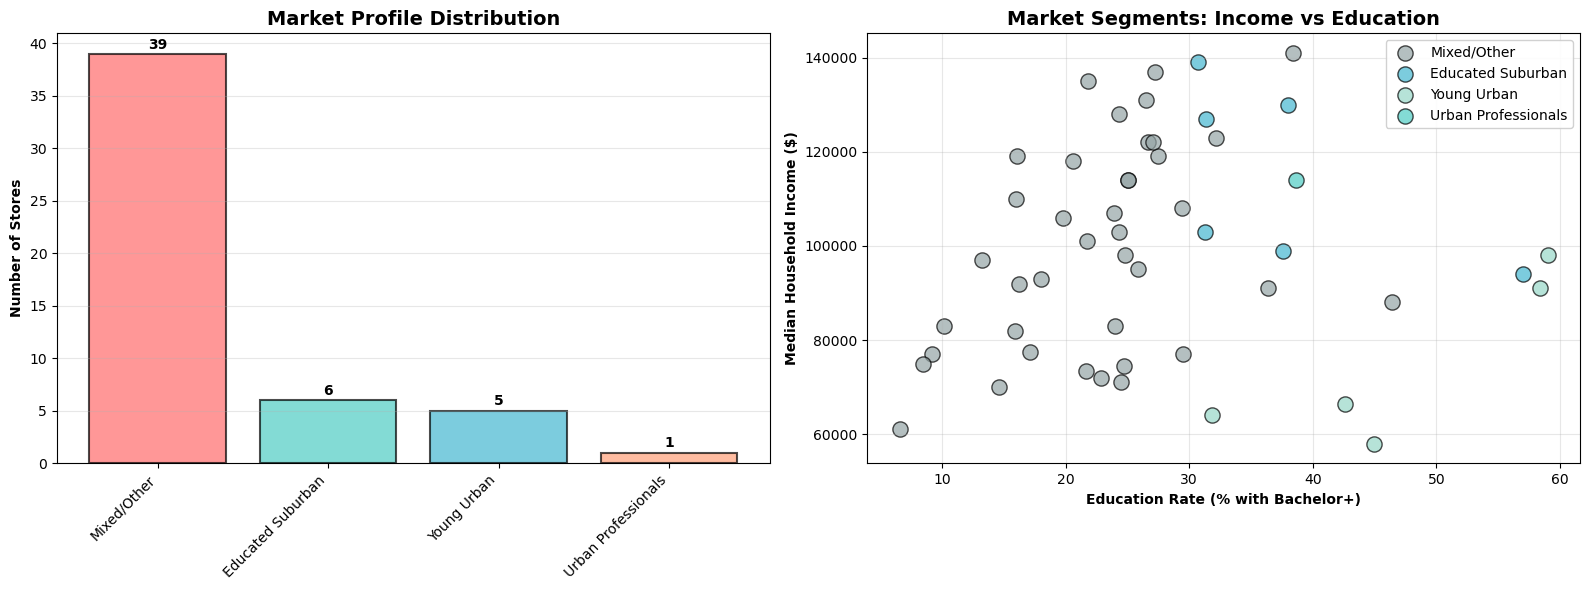

In [29]:
print("\n" + "="*70)
print("MARKET PROFILE SEGMENTATION")
print("="*70)

# Define market profiles based on multiple criteria
def categorize_market(row):
    income = row['Median total income of household in 2020 ($)']
    family_rate = row['couple_family_rate']
    education = row['education_rate']
    density = row['population_density']
    
    # Premium Families: High income, high family rate, suburban
    if income > 110000 and family_rate > 50 and density < 3000:
        return 'Premium Families'
    
    # Urban Professionals: High income, low family rate, high density
    elif income > 100000 and family_rate < 40 and density > 5000:
        return 'Urban Professionals'
    
    # Educated Suburban: High education, moderate everything
    elif education > 30 and 1500 < density < 5000:
        return 'Educated Suburban'
    
    # Working Families: Moderate income, high family rate
    elif 70000 < income < 100000 and family_rate > 45:
        return 'Working Families'
    
    # Young Urban: Younger age, high density, lower family rate
    elif row['Median age of the population'] < 38 and density > 3000:
        return 'Young Urban'
    
    else:
        return 'Mixed/Other'

df['market_profile'] = df.apply(categorize_market, axis=1)

# Analyze segments
print("\nMarket Profile Distribution:")
print(df['market_profile'].value_counts())

print("\nProfile Characteristics:")
profile_stats = df.groupby('market_profile').agg({
    'Store Name': 'count',
    'Median total income of household in 2020 ($)': 'mean',
    'education_rate': 'mean',
    'couple_family_rate': 'mean',
    'population_density': 'mean',
    'Median age of the population': 'mean'
}).round(1)
profile_stats.columns = ['# Stores', 'Avg Income', 'Edu %', 'Family %', 'Density', 'Age']
print(profile_stats)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Market profile distribution
profile_counts = df['market_profile'].value_counts()
axes[0].bar(range(len(profile_counts)), profile_counts.values,
            color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#95A5A6'],
            alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(len(profile_counts)))
axes[0].set_xticklabels(profile_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Stores', fontweight='bold')
axes[0].set_title('Market Profile Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for i, v in enumerate(profile_counts.values):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# Income vs Education colored by profile
colors_map = {
    'Premium Families': '#FF6B6B',
    'Urban Professionals': '#4ECDC4',
    'Educated Suburban': '#45B7D1',
    'Working Families': '#FFA07A',
    'Young Urban': '#98D8C8',
    'Mixed/Other': '#95A5A6'
}

for profile in df['market_profile'].unique():
    profile_data = df[df['market_profile'] == profile]
    axes[1].scatter(profile_data['education_rate'],
                    profile_data['Median total income of household in 2020 ($)'],
                    label=profile, s=120, alpha=0.7, 
                    color=colors_map.get(profile, '#95A5A6'),
                    edgecolors='black', linewidth=1)

axes[1].set_xlabel('Education Rate (% with Bachelor+)', fontweight='bold')
axes[1].set_ylabel('Median Household Income ($)', fontweight='bold')
axes[1].set_title('Market Segments: Income vs Education', fontsize=14, fontweight='bold')
axes[1].legend(loc='best', framealpha=0.9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('market_segmentation.png', dpi=300, bbox_inches='tight')
print("\n✓ Market segmentation visualization saved!")

# STEP 5: REGIONAL COMPARISON


REGIONAL COMPARISON ANALYSIS

Comprehensive Regional Statistics:
                      # Stores  Avg Pop  Avg Density  Avg Age  Avg Income  \
region                                                                      
Eastern Ontario             18  35222.9       2835.3     40.1     97594.4   
GTA/Golden Horseshoe        14  45855.9       1853.6     42.3    114142.9   
Southwestern Ontario         8  32046.5       1482.1     39.4     81437.5   
Toronto                     11  25267.7      10003.2     38.4     96909.1   

                      Edu %  Family %  Employ %  Driver %  
region                                                     
Eastern Ontario        25.2      19.9      47.2      18.4  
GTA/Golden Horseshoe   22.7      20.6      46.6      24.5  
Southwestern Ontario   17.6      19.7      44.6      26.2  
Toronto                42.9      20.0      56.3      11.0  

✓ Regional comparison visualization saved!


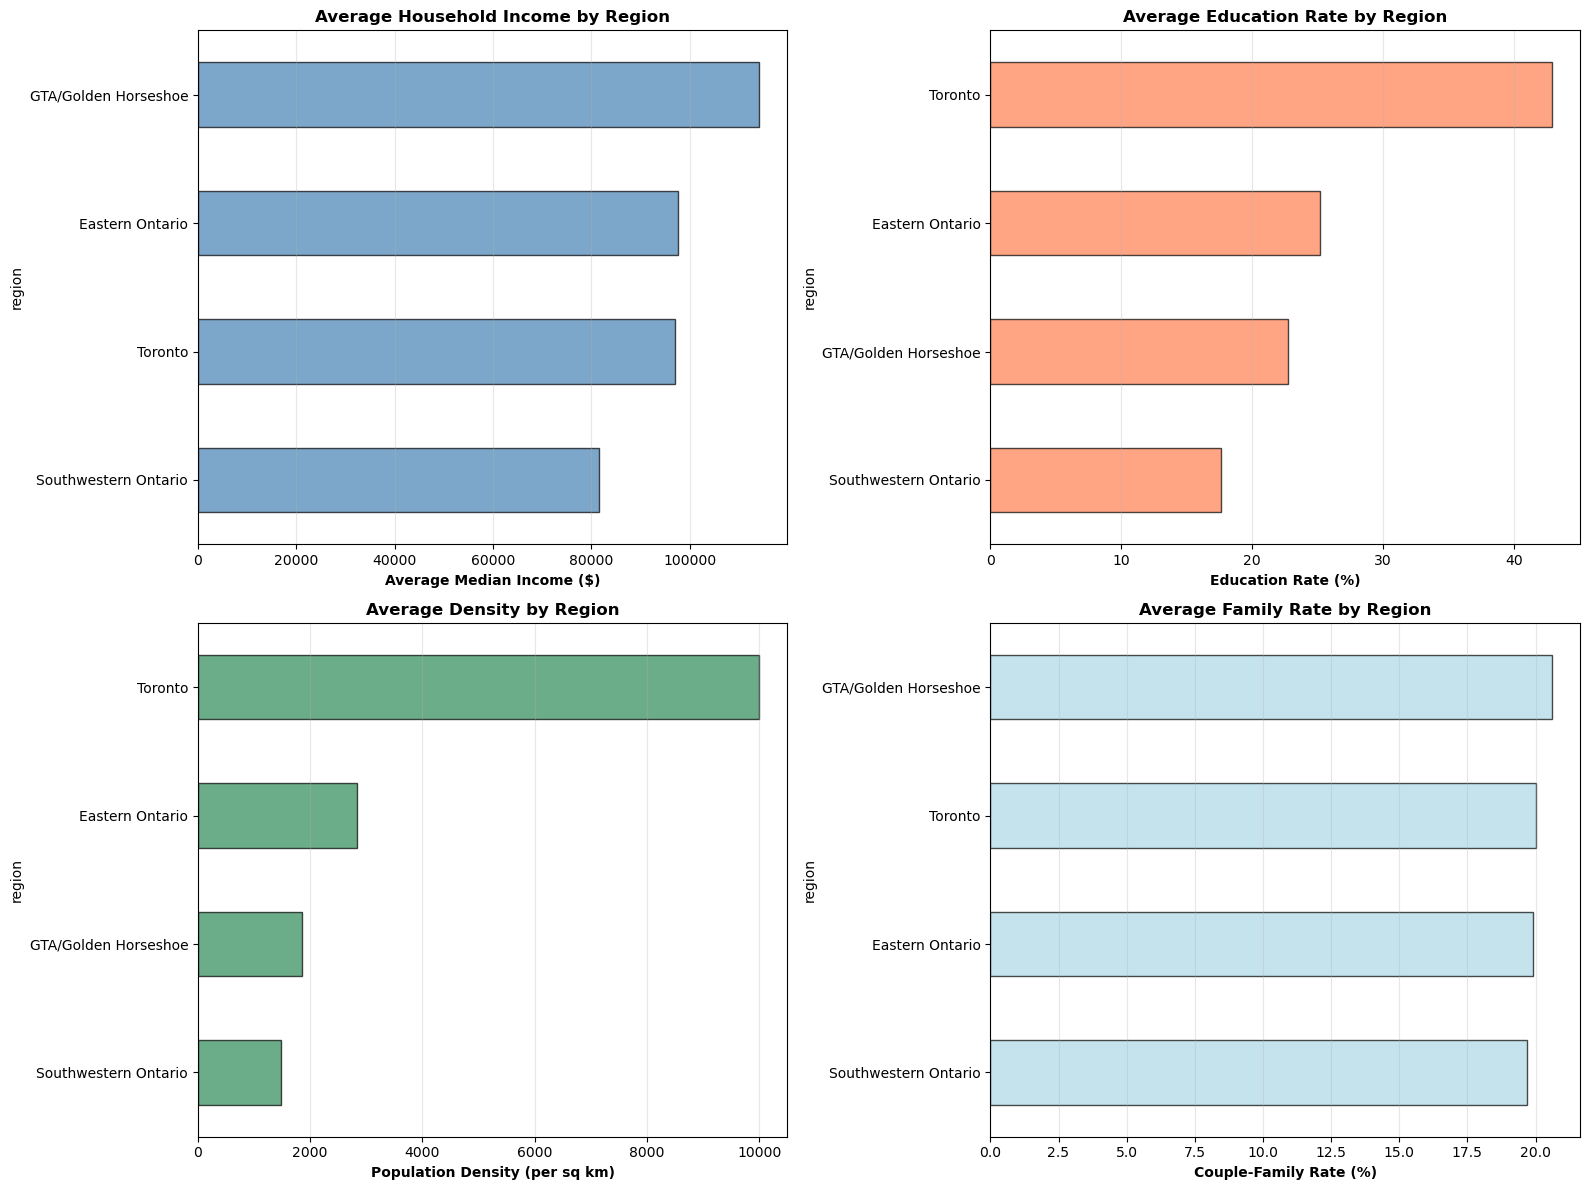

In [30]:
print("\n" + "="*70)
print("REGIONAL COMPARISON ANALYSIS")
print("="*70)

# Comprehensive regional statistics
regional_stats = df.groupby('region').agg({
    'Store Name': 'count',
    'Population, 2021': 'mean',
    'population_density': 'mean',
    'Median age of the population': 'mean',
    'Median total income of household in 2020 ($)': 'mean',
    'education_rate': 'mean',
    'couple_family_rate': 'mean',
    'employment_rate': 'mean',
    'driver_rate': 'mean'
}).round(1)

regional_stats.columns = [
    '# Stores', 'Avg Pop', 'Avg Density', 'Avg Age', 
    'Avg Income', 'Edu %', 'Family %', 'Employ %', 'Driver %'
]

print("\nComprehensive Regional Statistics:")
print(regional_stats)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Income by region
regional_stats['Avg Income'].sort_values().plot(kind='barh', ax=axes[0, 0],
                                                  color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Average Median Income ($)', fontweight='bold')
axes[0, 0].set_title('Average Household Income by Region', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3, axis='x')

# Education by region
regional_stats['Edu %'].sort_values().plot(kind='barh', ax=axes[0, 1],
                                            color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Education Rate (%)', fontweight='bold')
axes[0, 1].set_title('Average Education Rate by Region', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='x')

# Density by region
regional_stats['Avg Density'].sort_values().plot(kind='barh', ax=axes[1, 0],
                                                   color='seagreen', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Population Density (per sq km)', fontweight='bold')
axes[1, 0].set_title('Average Density by Region', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='x')

# Family rate by region
regional_stats['Family %'].sort_values().plot(kind='barh', ax=axes[1, 1],
                                               color='lightblue', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Couple-Family Rate (%)', fontweight='bold')
axes[1, 1].set_title('Average Family Rate by Region', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('regional_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Regional comparison visualization saved!")

# STEP 6: IDENTIFY HIGH-VALUE EXPANSION OPPORTUNITIES

In [31]:
print("\n" + "="*70)
print("HIGH-VALUE MARKET IDENTIFICATION")
print("="*70)

# Define ideal market criteria based on data
income_q3 = df['Median total income of household in 2020 ($)'].quantile(0.75)
education_q3 = df['education_rate'].quantile(0.75)
density_median = df['population_density'].median()

print("\nIdeal Market Criteria (Based on Top Performers):")
print(f"  Income: >${income_q3:,.0f}")
print(f"  Education Rate: >{education_q3:.1f}%")
print(f"  Density: 1,500 - 5,000 per sq km")
print(f"  Age: 35-45 years")

# Find high-value markets
high_value = df[
    (df['Median total income of household in 2020 ($)'] >= income_q3) &
    (df['education_rate'] >= education_q3) &
    (df['population_density'] >= 1500) &
    (df['population_density'] <= 5000) &
    (df['Median age of the population'] >= 35) &
    (df['Median age of the population'] <= 45)
]

print(f"\nHigh-Value Markets Found: {len(high_value)} stores")
print("\nHigh-Value Market Details:")
print(high_value[['Store Name', 'FSA', 'region', 
                  'Median total income of household in 2020 ($)',
                  'education_rate', 'population_density']].to_string(index=False))

# Regional distribution of high-value markets
print("\nHigh-Value Markets by Region:")
hv_by_region = high_value['region'].value_counts()
print(hv_by_region)

# Calculate gap analysis
print("\nRegional Penetration Gap Analysis:")
total_by_region = df['region'].value_counts()
hv_by_region_full = high_value['region'].value_counts().reindex(total_by_region.index, fill_value=0)
gap_analysis = pd.DataFrame({
    'Total Stores': total_by_region,
    'High-Value Stores': hv_by_region_full,
    'HV %': (hv_by_region_full / total_by_region * 100).round(1)
})
print(gap_analysis.sort_values('HV %', ascending=False))


HIGH-VALUE MARKET IDENTIFICATION

Ideal Market Criteria (Based on Top Performers):
  Income: >$118,500
  Education Rate: >31.6%
  Density: 1,500 - 5,000 per sq km
  Age: 35-45 years

High-Value Markets Found: 1 stores

High-Value Market Details:
Store Name FSA  region  Median total income of household in 2020 ($)  education_rate  population_density
   Leaside M4G Toronto                                      130000.0       38.014083         2747.742695

High-Value Markets by Region:
region
Toronto    1
Name: count, dtype: int64

Regional Penetration Gap Analysis:
                      Total Stores  High-Value Stores  HV %
region                                                     
Toronto                         11                  1   9.1
Eastern Ontario                 18                  0   0.0
GTA/Golden Horseshoe            14                  0   0.0
Southwestern Ontario             8                  0   0.0


# STEP 7: CREATE EXECUTIVE SUMMARY DASHBOARD

In [39]:
# Calculate comprehensive KPIs
kpis = {
    'Total Stores': len(df),
    'Total Population Served': f"{df['Population, 2021'].sum():,.0f}",
    'Average Population per FSA': f"{df['Population, 2021'].mean():,.0f}",
    'Median Population per FSA': f"{df['Population, 2021'].median():,.0f}",
    'spacer1': '', # Added a unique key and a value
    'Average Median Income': f"${df['Median total income of household in 2020 ($)'].mean():,.0f}",
    'Income Range (P25-P75)': f"${df['Median total income of household in 2020 ($)'].quantile(0.25):,.0f} - ${df['Median total income of household in 2020 ($)'].quantile(0.75):,.0f}",
    'spacer2': '', # Added a unique key and a value
    'Average Education Rate': f"{df['education_rate'].mean():.1f}%",
    'Average Employment Rate': f"{df['employment_rate'].mean():.1f}%",
    'Permanent Employment': f"{df['permanent_rate'].mean():.1f}%",
    'spacer3': '',
    'Average Family Rate': f"{df['couple_family_rate'].mean():.1f}%",
    'Average Children Rate': f"{df['children_rate'].mean():.1f}%",
    'spacer4': '',
    'Average Car Ownership': f"{df['driver_rate'].mean():.1f}%",
    'Average Density': f"{df['population_density'].mean():,.0f} per sq km",
    'Average Age': f"{df['Median age of the population'].mean():.1f} years"
}

# Your loop will now work correctly
for key, value in kpis.items():
    if 'spacer' in key: # Updated to detect the spacer keys
        print()
    else:
        print(f"{key:<35}: {value}")

Total Stores                       : 51
Total Population Served            : 1,810,313
Average Population per FSA         : 35,496
Median Population per FSA          : 32,046

Average Median Income              : $99,455
Income Range (P25-P75)             : $79,750 - $118,500

Average Education Rate             : 27.2%
Average Employment Rate            : 48.6%
Permanent Employment               : 79.0%

Average Family Rate                : 20.1%
Average Children Rate              : 1.1%

Average Car Ownership              : 19.7%
Average Density                    : 3,900 per sq km
Average Age                        : 40.2 years


# STEP 8: GENERATE COMPREHENSIVE REPORT

In [40]:
# Save processed dataset with all derived metrics
output_filename = 'farm_boy_analysis_complete.csv'
df.to_csv(output_filename, index=False)
print(f"\n✓ Complete dataset saved to '{output_filename}'")

# Create summary statistics file
summary_stats = {
    'Basic Demographics': df[['Population, 2021', 'population_density', 
                              'Median age of the population']].describe(),
    'Economic Metrics': df[['Median total income of household in 2020 ($)', 
                            'education_rate', 'employment_rate']].describe(),
    'Family Structure': df[['couple_family_rate', 'children_rate']].describe(),
    'Transportation': df[['driver_rate', 'total_car_use_rate']].describe()
}

with open('summary_statistics.txt', 'w') as f:
    for category, stats in summary_stats.items():
        f.write(f"\n{'='*70}\n")
        f.write(f"{category}\n")
        f.write(f"{'='*70}\n")
        f.write(stats.to_string())
        f.write("\n")

print("✓ Summary statistics saved to 'summary_statistics.txt'")

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)
print("\nGenerated Files:")
print("  1. income_analysis.png")
print("  2. education_analysis.png")
print("  3. family_structure_analysis.png")
print("  4. employment_transportation_analysis.png")
print("  5. correlation_matrix.png")
print("  6. market_segmentation.png")
print("  7. regional_comparison.png")
print("  8. farm_boy_analysis_complete.csv")
print("  9. summary_statistics.txt")


✓ Complete dataset saved to 'farm_boy_analysis_complete.csv'
✓ Summary statistics saved to 'summary_statistics.txt'

ANALYSIS COMPLETE!

Generated Files:
  1. income_analysis.png
  2. education_analysis.png
  3. family_structure_analysis.png
  4. employment_transportation_analysis.png
  5. correlation_matrix.png
  6. market_segmentation.png
  7. regional_comparison.png
  8. farm_boy_analysis_complete.csv
  9. summary_statistics.txt
